In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [21]:
# importing the dataset
advertising = pd.read_csv("Advertising.csv")

In [22]:
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
advertising.shape

(200, 5)

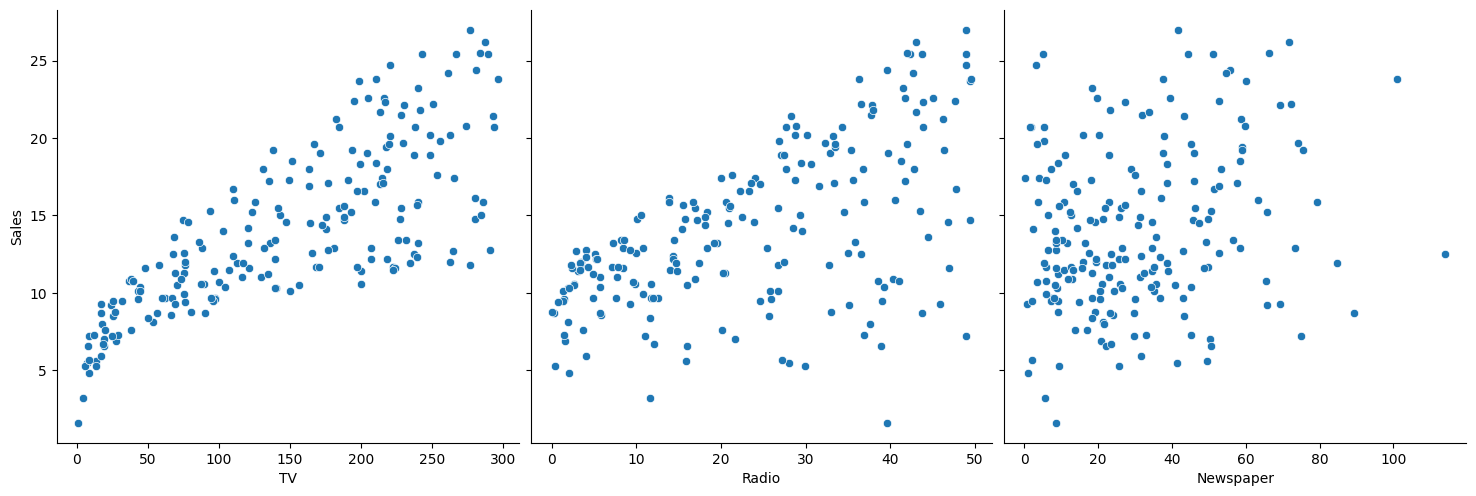

In [14]:
# visualisation

sns.pairplot(advertising,x_vars = ['TV' , 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5 , kind = 'scatter')

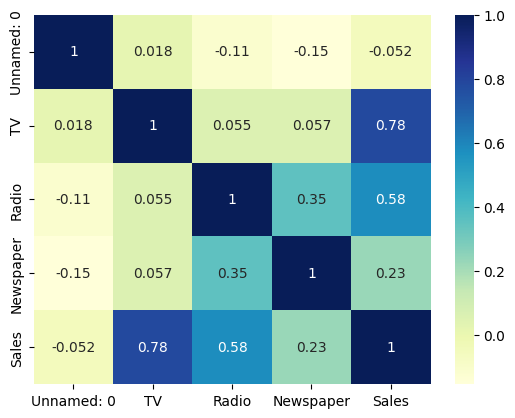

In [15]:
sns.heatmap(advertising.corr() , cmap = 'YlGnBu' , annot = True)
plt.show()

In [23]:
X = advertising['Radio']
y = advertising['Sales']

In [24]:
# splitting the data into two halves for training 70 and for testing 30.
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=2)

In [25]:
X_train_lm

28     27.1
133    33.5
94     14.0
42     27.7
169    10.6
       ... 
43      8.4
22     15.9
72     33.0
15     47.7
168    23.6
Name: Radio, Length: 140, dtype: float64

In [26]:
X_test_lm.head()

112    15.4
29     16.0
182     5.7
199     8.6
193    42.0
Name: Radio, dtype: float64

In [27]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

array([[27.1],
       [33.5],
       [14. ],
       [27.7],
       [10.6],
       [20.3],
       [21.3],
       [11. ],
       [ 0.4],
       [ 5.7],
       [ 2.6],
       [37.6],
       [ 7.3],
       [ 7.7],
       [39.3],
       [16. ],
       [ 4.1],
       [25.8],
       [18.1],
       [13.9],
       [49. ],
       [43.8],
       [20.9],
       [10. ],
       [15.5],
       [37.8],
       [16.7],
       [ 1.3],
       [42.3],
       [36.9],
       [27.7],
       [36.9],
       [43.5],
       [33.2],
       [28.5],
       [28.3],
       [21.1],
       [39.6],
       [29.5],
       [ 5.4],
       [46.8],
       [ 0. ],
       [43.9],
       [10.8],
       [36.5],
       [ 8.4],
       [ 5.1],
       [49.4],
       [36.6],
       [23.3],
       [ 1.5],
       [41.7],
       [26.8],
       [ 9.3],
       [24.6],
       [41.1],
       [35.8],
       [14.8],
       [ 4.9],
       [40.6],
       [ 4.9],
       [43. ],
       [20.5],
       [21. ],
       [36.3],
       [11.8],
       [14

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
LinearRegression()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
print(lm.intercept_)

8.89883160471697


In [29]:
print(lm.coef_)

[0.22780541]


In [30]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [31]:
from sklearn.metrics import r2_score

In [32]:
print(r2_score(y_train_lm,y_train_pred))

0.41089672557081225


In [33]:
print(r2_score(y_test_lm,y_test_pred))

0.10549828774804615


In [34]:
y_train_pred

array([15.07235827, 16.5303129 , 12.08810737, 15.20904151, 11.31356897,
       13.52328147, 13.75108688, 11.40469113,  8.98995377, 10.19732245,
        9.49112568, 17.46431509, 10.56181111, 10.65293328, 17.85158429,
       12.54371819,  9.83283379, 14.77621123, 13.02210956, 12.06532683,
       20.06129678, 18.87670864, 13.65996471, 11.17688572, 12.42981549,
       17.50987617, 12.70318198,  9.19497864, 18.53500053, 17.3048513 ,
       15.20904151, 17.3048513 , 18.80836702, 16.46197128, 15.39128584,
       15.34572476, 13.70552579, 17.91992591, 15.61909125, 10.12898083,
       19.56012488,  8.8988316 , 18.89948918, 11.35913005, 17.21372914,
       10.81239706, 10.06063921, 20.15241895, 17.23650968, 14.2066977 ,
        9.24053972, 18.39831728, 15.00401664, 11.01742193, 14.50284474,
       18.26163403, 17.05426535, 12.2703517 , 10.01507812, 18.14773133,
       10.01507812, 18.69446431, 13.56884255, 13.68274525, 17.16816805,
       11.58693546, 12.24757116, 19.60568596, 18.62612269,  9.83

In [35]:
y_test_pred

array([12.40703495, 12.54371819, 10.19732245, 10.85795815, 18.4666589 ,
       13.09045118, 10.22010299, 15.45962747, 16.87202102,  9.83283379,
       16.89480156, 16.5303129 , 10.63015273, 17.76046213,  9.67337   ,
       19.35510001, 14.75343069, 18.30719511, 13.59162309, 16.39362965,
       12.74874306,  9.69615055, 16.37084911, 17.6921205 ,  9.67337   ,
       10.51625003, 14.02445337, 11.01742193, 12.49815711,  9.44556459,
        9.42278405, 18.64890323,  9.49112568, 13.27269551, 15.71021342,
       12.15644899, 20.06129678, 15.77855504,  9.5594673 , 19.42344163,
       15.48240801, 17.28207076, 17.55543725, 16.78089885, 15.02679718,
       16.96314318, 16.50753236, 17.91992591, 12.77152361, 20.03851624,
       13.09045118,  9.87839488, 14.36616149, 15.43684692, 11.76917979,
       19.78793029, 14.50284474,  9.37722297, 13.47772038, 20.03851624])

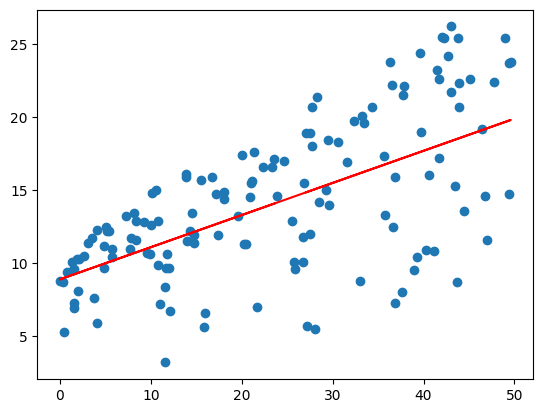

In [40]:
plt.scatter(X_train_lm,y_train_lm)
plt.plot(X_train_lm , 8.89+0.22*X_train_lm ,'r')
plt.show()

In [30]:
# TV+Radio+Newspaper
feature_cols = ['TV','Radio','Newspaper']
# create X and y X here is input features and y here is target variable/output variable
X = advertising[feature_cols]
y = advertising.Sales
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

# print the coefficient
print(lm2.coef_)
print(lm2.intercept_)
list(zip(feature_cols,lm2.coef_))

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459412


[('TV', np.float64(0.0457646454553976)),
 ('Radio', np.float64(0.18853001691820445)),
 ('Newspaper', np.float64(-0.0010374930424763285))]

In [42]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [43]:
from sklearn.metrics import r2_score

In [31]:
r2 = lm2.score(X, y)
print("R-squared (using score):", r2)

R-squared (using score): 0.8972106381789522


In [32]:
from sklearn.metrics import r2_score

y_pred = lm2.predict(X)          # predict Sales using the fitted model
print(r2_score(y, y_pred))       # print the R² value

0.8972106381789522
